In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
plt.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn-dark-palette']

In [104]:
plt.style.use('seaborn-talk')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

In [4]:
df = pd.read_csv('../data/sea_all_years.csv')

/Users/cf/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df = df.drop('Unnamed: 0.1', axis=1)

In [6]:
# Function to check what percentage of each column is null
def checknulls(df):
    total = len(df)
    for c in df.columns.values:
        notnull = pd.notnull(df[c])
        selected = df.ix[notnull, c]
        print c, selected.count() / float(total)

In [7]:
#checknulls(df)

In [8]:
# Drop a couple of columns, see what happens

In [9]:
df = df.dropna(axis=0, subset=['ArrTime', 'ArrDelay', 'DepDelay', 'DepTime', 'ActualElapsedTime', 'CRSElapsedTime', 'Distance'])

In [10]:
dates = df.ix[:, ['Year', 'Month', 'DayofMonth']]
dates.columns = ['year', 'month', 'day']

In [11]:
dates = pd.to_datetime(dates, infer_datetime_format=True)

In [12]:
df['Date'] = dates

In [13]:
df.head(1).T

,0
Unnamed: 0,0
ActualElapsedTime,147
AirTime,NaN
ArrDelay,-4
ArrTime,926
CRSArrTime,930
CRSDepTime,700
CRSElapsedTime,150
CancellationCode,NaN
Cancelled,0


In [ ]:
date_delays = df.ix[(df['Date'] > '1988-01-01') & (df['Date'] < '2016-08-01'), ['Date', 'DepDelay']].groupby('Date').mean()['DepDelay']
date_delay_counts = df.ix[(df['Date'] > '2009-01-25') & (df['Date'] < '2009-04-01'), ['DayOfWeek', 'DepDelay']].groupby('DayOfWeek').count()['DepDelay']

In [14]:
def date_num_select(df, col, start, end):
    return df.ix[(df['Date'] > start) & (df['Date'] < end), ['Date', col]].groupby('Date').mean()[col]

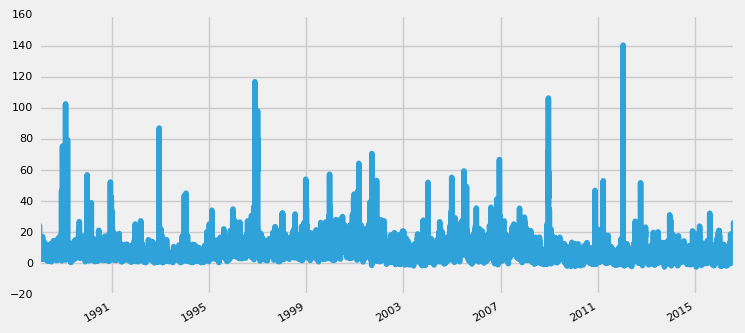

In [24]:

fig, ax = plt.subplots(figsize=(8, 4))
fig.autofmt_xdate()
plt.ylabel = 'Avg. Departure Delay'
plt.plot(date_num_select(df, 'DepDelay', '1985-01-01', '2016-09-01'))
plt.show()

In [16]:
# Delays look unsusprising, for the most part. 
# Let's look at those spikes after 2007...

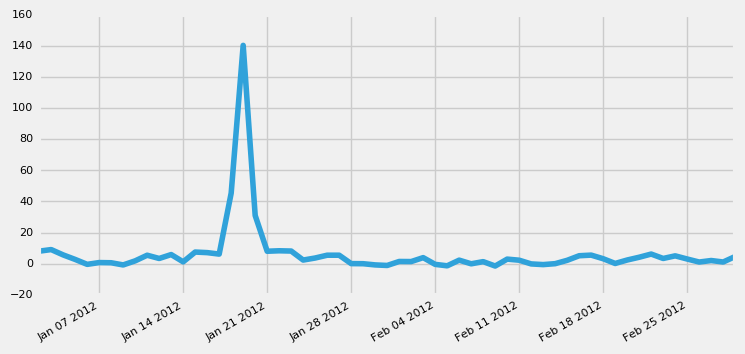

In [25]:
# This one was a snow/ice storm on Jan. 18-19 2012
fig, ax = plt.subplots(figsize=(8, 4))
fig.autofmt_xdate()
plt.plot(date_num_select(df, 'DepDelay', '2012-01-01', '2012-03-01'))

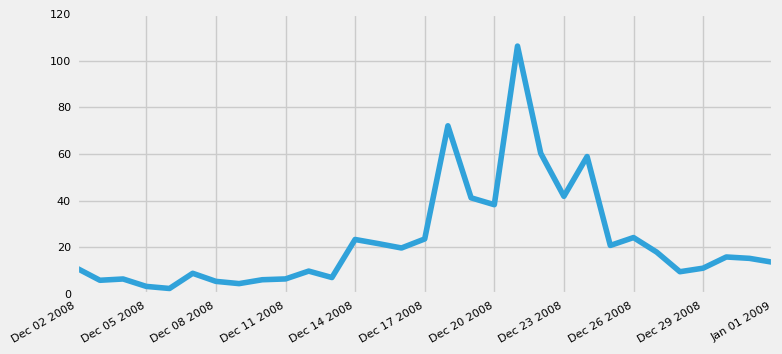

In [26]:
# Unusually severe snowfall occurred in December 2008.
# These two weather events in '08 and '12 indicate that SeaTac is quite sensitive to snow.
fig, ax = plt.subplots(figsize=(8, 4))
fig.autofmt_xdate()
plt.plot(date_num_select(df, 'DepDelay', '2008-12-01', '2009-01-02'))

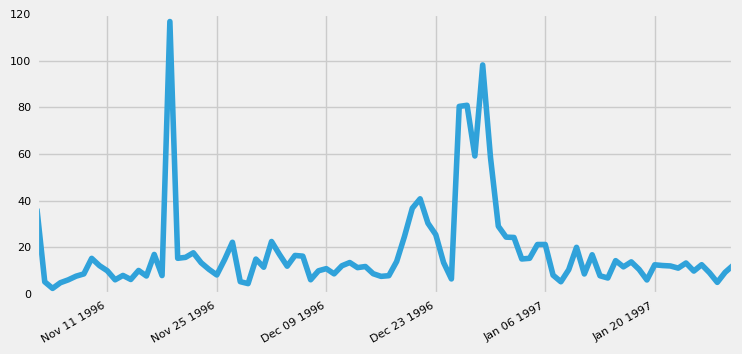

In [31]:
# One More...
# Another couple snow storms, one in a series in December '96 - January '97, one isolated ice storm in November '96
fig, ax = plt.subplots(figsize=(8, 4))
fig.autofmt_xdate()
plt.plot(date_num_select(df, 'DepDelay', '1996-11-01', '1997-01-31'))

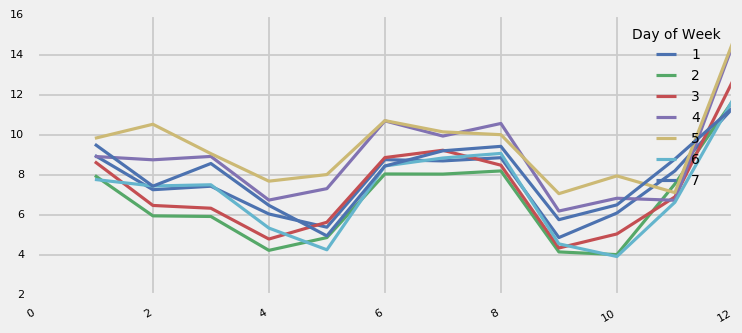

In [72]:
# Let's look at day of week effects, for each month.

fig, ax = plt.subplots(figsize=(8, 4))
fig.autofmt_xdate()
for d in xrange(1, 8):
    delays = df.ix[df['DayOfWeek']==d, ['Month', 'DepDelay']].groupby('Month').mean()
    ax.plot(delays, label=d)
plt.legend(title="Day of Week", framealpha=0)

plt.show()

xrange(13)

In [53]:
timeeffects = df.ix[:, ['Month', 'DayOfWeek', 'DepDelay']].groupby(['Month', 'DayOfWeek']).mean()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11ed58850>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11fa96f10>], dtype=object)

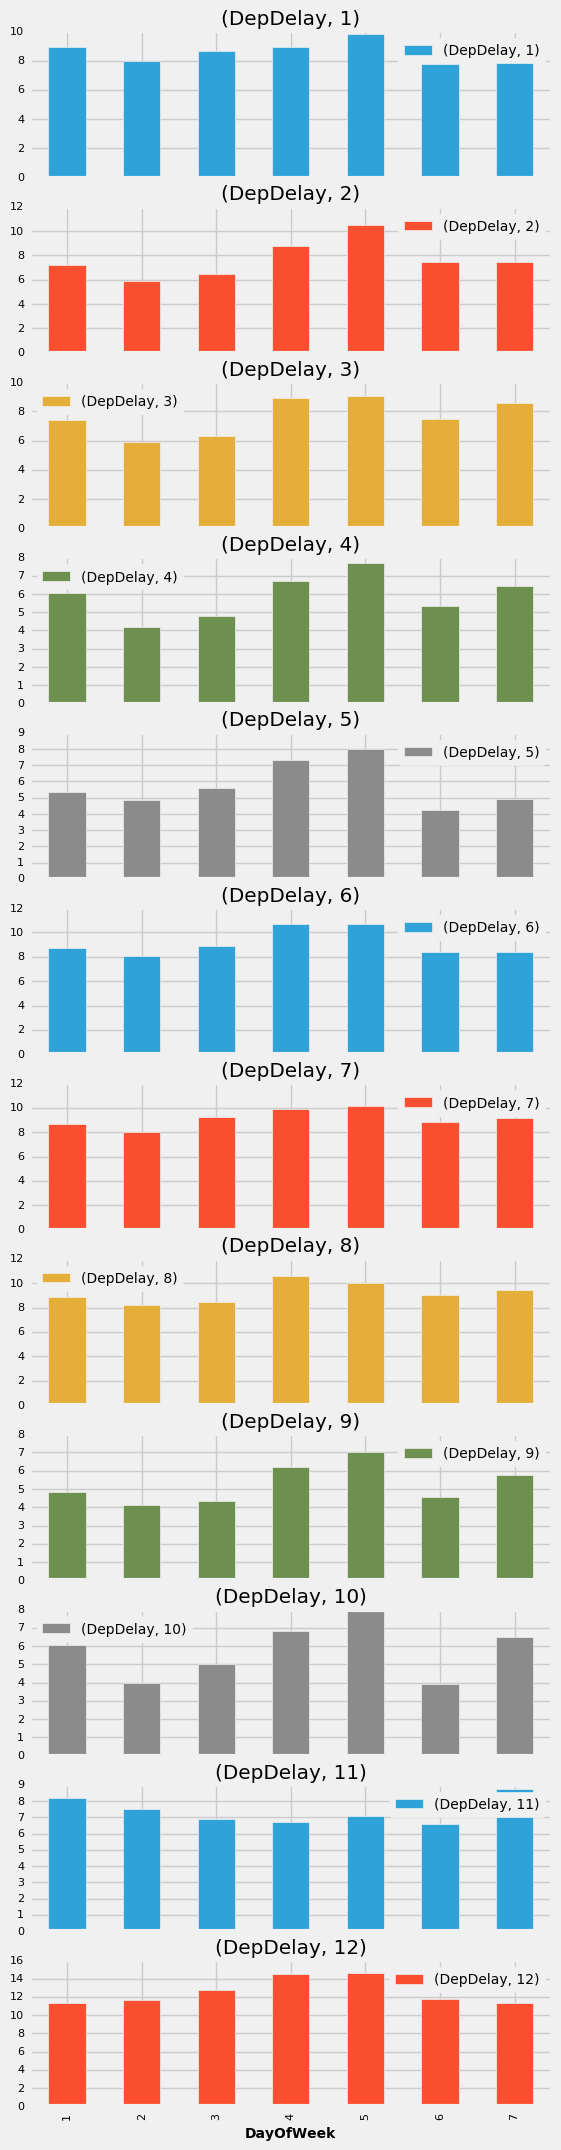

In [58]:
timeeffects.unstack(level=0).plot(kind='bar', subplots=True, figsize=(6, 25))

In [74]:
# Carrier effects - departing Seattle

In [75]:
df_origin_sea = df.ix[df['Origin'] == 'SEA', :]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1211cdf10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x120cffc10>], dtype=object)

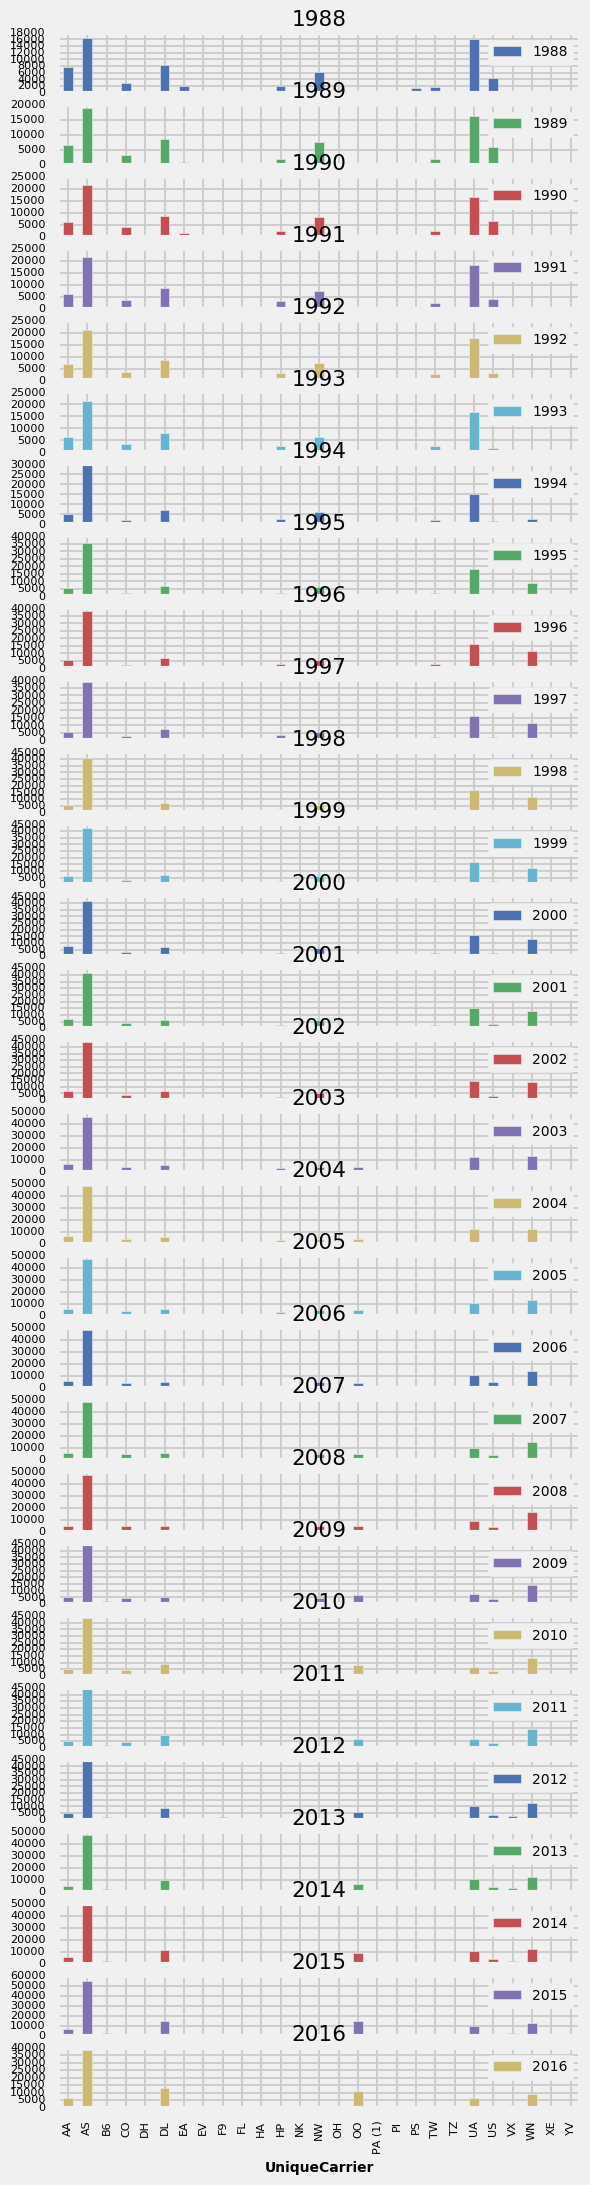

In [81]:
carriereffects = df_origin_sea.groupby(['Year', 'UniqueCarrier']).count()['DepDelay']
carriereffects.unstack(level=0).plot(kind='bar', subplots=True, figsize=(6, 25))

In [99]:
# Look at effect of being on an Alaska flight (any priority? or congestion perhaps?)

df_origin_sea['Alaska'] = df_origin_sea['UniqueCarrier'] == 'AS'

/Users/cf/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [94]:
df_origin_sea.index= df_origin_sea.Date

In [100]:
AS_effects = df_origin_sea.ix[df_origin_sea['Date'] > '2000-01-01', :].groupby(['Alaska', pd.TimeGrouper(freq='M')]).mean()['DepDelay']

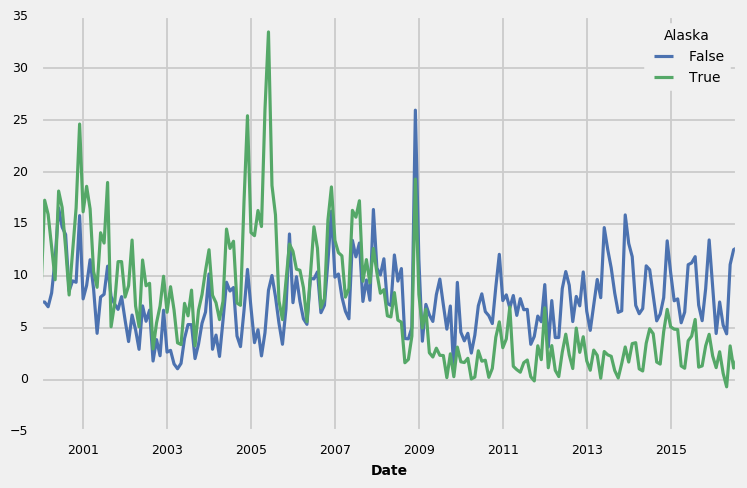

In [105]:
AS_effects.unstack(level=0).plot(kind='line', figsize=(8,5))
plt.savefig('runwayeffect.png')

In [126]:
AS_only = df_origin_sea.ix[(df_origin_sea['Date'] > '2000-01-01'), :].groupby(['UniqueCarrier', pd.TimeGrouper(freq='M')]).count()[['CRSDepTime']]


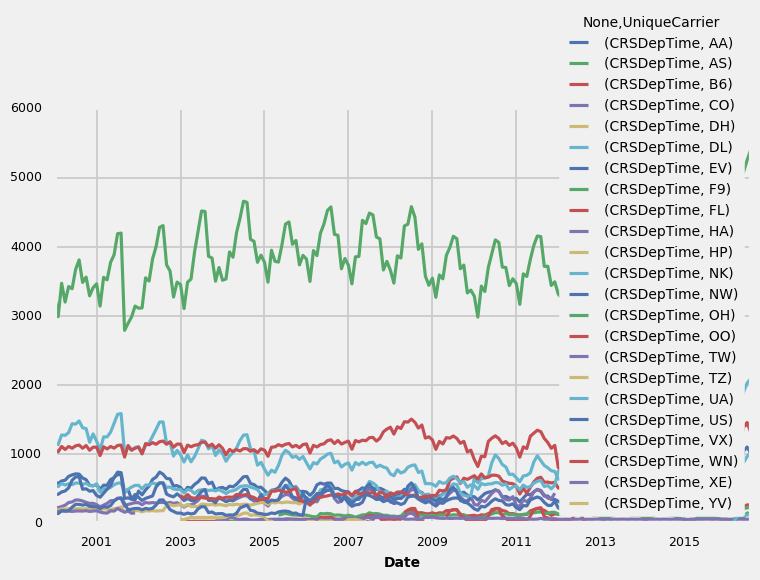

In [130]:
AS_only.unstack(level=0).plot(kind='line', figsize=(8, 5))
plt.figlegend = []